# Website Selection

## Website Selection Justification

Only trusted Australian news sources were considered, which meant first examining their machinery of care, transparency, expertise and agenda (Caulfield, 2017). Furthermore, only news sources which provided publicly available data and consent for web crawling their data were pursued in order to remain ethical. The combination of these two factors significantly limited the pool of Australian news source candidates to consume to just one: https://www.onthehouse.com.au. Hence, the selected website for this Project was https://www.onthehouse.com.au. In terms of the layout of this website, each news article was displayed as a single block on the page and there were 136 property news pages at the time of this study.

## Base Data Required

The base data required for predicting the relative strengths of the property market across all states and territories in Australia, as a function of time, was deemed to comprise of the publication date and entire body text of each property news article. Returning the entire body text allowed for the identification of all GPE and LOC data present as an input to the sentiment analysis and returning the publication date allowed for tracking of these sentiments over time.

## Data Supplementation

The base data was supplemented by also extracting the title of the news article and the tags available on most articles, which listed the states and territories discussed in the article. The title was acquired in order to obtain as much context about the news article as possible for further analysis. Moreover, the tags were acquired to act as the true labels for validating the Named Entity Recognition (NER) and geocoding models in the NLP pipeline. While these place tags did exist, it was discovered that a significant number of these tags were missing from various property news articles as detailed further in the Exploratory Data Analysis (EDA) section of this Report. This finding further underlined the necessity to incorporate the NER and geocoding models into the proposed NLP pipeline.  

## Ethics of Data Extraction

Consent for web crawling the data on this Australian news source was confirmed by consulting with the website's copyright protection notice and the robots.txt file found at the root of the website. While this website did not openly acknowledge previously allowed web scraping, the only disallow directive present in the robots.txt file was for any data under https://www.onthehouse.com.au/real-estate-agents, however, all relevant data for this Project was contained under https://www.onthehouse.com.au/news instead. Furthermore, all of the relevant data was not behind any kind of walled garden, pay or otherwise, which specified that it was publicly available data.

\pagebreak

# Description of Web Crawler Workflow

A class was used to house all of the functions that comprised the web crawler application. This decision to utilise object-oriented programming (OOP) was made as it increased scalability, maintainability and reusuability of the code (Python Software Foundation, 2021). The web crawler class comprised of the following distinct components: \

- **Load necessary Python libraries**: the *selenium* package was loaded in order to automate web browser interactions from Python. Examples of required web browser interactions included launching a browser, extracting text from HTML elements found across different websites, clicking through different pages of the website and closing the browser. Additionally, the *pandas* package was loaded to enable the storage of extracted data as DataFrame objects for data manipulation further downstream. Moreover, the *datetime* package was loaded in order to save the web crawler extraction date in the extracted data outputs for tracking purposes. \
- **Launch browser and open website**: the *ChromeDriver* was executed during the initialisation of the web crawler class to launch the Google Chrome web browser. It was then possible to execute a *Selenium* script to open the *onthehouse* website from there. The *ChromeDriver* was chosen over the *FirefoxDriver* as Google Chrome accounted for approximately 65% of the browser market share, and so it was more likely that most of the visitors to the *onthehouse* website used Google Chrome (Statcounter, 2021). \
- **Obtain and store relevant URL addresses**: before the text corpus and other relevant data could be extracted, a list of URL addresses leading to these property news articles were first extracted from the title listings on the home pages using a *Selenium* script. Obtaining these URL addresses made it easier to navigate to the relevant property news articles on the website. The *get_URLs()* function in the class performed this task. This list of URL addresses was then stored as a CSV file to provide transparency on where the web crawler would extract data from later on. Further details regarding the web navigation process and the data extraction process involved can be found in the subsequent section. \
- **Extract and store relevant news data**: looping through each of the URL addresses collected earlier, each website was individually opened and from this point, the title, date, body text, and tags were then extracted using a *Selenium* script under the *get_Content()* function in the class. All of the extracted data was then stored as a CSV file so that the NLP pipeline could be applied to the data without having to re-run the web crawler application. \
- **Quite driver**: once the relevant data was collected and stored successfully, the browser was closed and the *ChromeDriver* session was terminated.

\pagebreak

# Data Extraction, Collection Method and Description of Corpus

## Data Extraction and Collection Method

After the initialisation of the web crawler class, the *run* method was the first to be executed. This method linked the *get_URLs()* method with the *get_Content()* method by feeding the output list of URL addresses as an input for extracting the base and supplementary data. 

One of the functionalities of the *get_URLs()* method was to control the navigation process through the *onthehouse* website. This was achieved by exploiting the HTML element for the *next page* button using the XPath tool. XPath was chosen for this task as it allowed for easy, readable and direct access to the relevant HTML element without having to go through the entire HTML tree (Datafiniti, 2014; Sahin, 2019). 

At the time of this study, the chosen website contained 136 pages of property news articles to navigate through, and the data from all of these website addresses were needed as it was deemed important to afford more power to the NLP models. This max page count was also acquired using XPath, however, additional transformations were needed to attain the desired format. First, the inner HTML was converted to text which returned "Page 1 of 136". Subsequently, the last page was stripped from this string and converted into an integer for use within a while loop using *j* as the iterator variable. Here, the web crawler would be programmed to jump to the next page repeatedly until this max page was reached. However, a responsible time delay of two seconds was added in between page jumps to prevent any violations to the terms of service of the website (Heydt, 2018). This decision to retrieve a dynamically changing max page count was deemed important in future-proofing the web crawler.

While on each page, the *get_URLs()* method also utilised XPath to retrieve the property news block URL addresses. It was observed that there were always five property news blocks on each page. Consequently, the path expression to select the relevant nodes in the XML document incorporated iteratively changing numbers from one to five to select all of these property news blocks on the page. This was performed within a while loop that used *i* as the iterator variable. Again, a responsible time delay of two seconds was added in between extractions of each property block URL address. Once all of the URL addresses were collected, the *get_URL()* method concluded by saving the output as a CSV file and returning the URL addresses as a list.

The *run* method then iteratively fed each URL in this list of URL addresses into the *get_Content()* method using a for loop. This for loop used *k* as the iterator variable. The title, date, body and tag data were then extracted using XPath, and if any information was missing, an 'N/A' value would be returned instead. This data was then appended to an empty DataFrame, row by row. The data extraction date was also appended at this point for tracking purposes. Once again, a responsible time delay of two seconds was added in between extracting the title, date, body and tag data from the news article website.

Prior to invoking the *quite_driver()* method, the *run* method also saved the extracted data as a CSV file and returned the DataFrame.

## Description of Corpus

The final output from the web crawler was a DataFrame containing the following columns: \

- **Body**: the body text of the news article as a string. \
- **Data_Date**: the date that the data was extracted by the web crawler as a date object. \
- **Date**: the date the news article was published as a string. \
- **Tags**: the place tags listed on the news article as a string. \
- **Title**: the title of the news article as a string.

The screenshot below displays the DataFrame object returned from the web crawler.
\

\begin{figure}[H]
    \centering
    \includegraphics{CorpusDescription}
    \caption{CorpusDescription}
    \label{CorpusDescription}
\end{figure}

\begin{center} Figure 1: Corpus Description \end{center}
\

## Data Transformation

Preliminary data preprocessing was conducted on the web crawler output so that it could be ingested by the NLP pipeline downstream. This involved converting any missing values or 'N/A' strings to nan values, converting the date strings into datetime, replacing unwanted characters (i.e. *â€™*), removing excess white spaces and transforming the tag strings into a list of tags per news article. \

\begin{figure}[H]
    \centering
    \includegraphics{TransformedData}
    \caption{TransformedData}
    \label{TransformedData}
\end{figure}

\begin{center} Figure 2: Transformed Data \end{center}
\

Subsequently, this DataFrame was exploded using the tags column so that the relevant sentences discussing distinct place tags could be analysed during the NLP pipeline. 

## Exploratory Data Analysis

During the EDA, it was identified that there were 1,287 rows of data in the output DataFrame. Additionally, it was found that the data extracted was dated from 2 May 2017 to 29 March 2021. Furthermore, there were no nan values within the date, body and title data, but there were 541 missing values in the tags data. The proportion of nan values against all non-nan values in the tag data is displayed in the following figure. This finding emphasisd the necessity for the inclusion of NER in the NLP pipeline to locate the place tags in the news articles. \

\begin{figure}[H]
    \centering
    \includegraphics{EDA1}
    \caption{EDA1}
    \label{EDA1}
\end{figure}

\begin{center} Figure 3: Exploratory Data Analysis \end{center}
\

\pagebreak

# Web Crawler Code with Screenshots

## Relevant Code

### Web Crawler

In [6]:
# import packages
import warnings # suppress warnings
warnings.filterwarnings('ignore') # suppress warnings
from selenium import webdriver # for opening webdriver
import time # for implementing time delays
import pandas as pd # for creating dataframes
pd.options.mode.chained_assignment = None  # to suppress SettingWithCopyWarning
from selenium.common.exceptions import NoSuchElementException # for raising exceptions
from datetime import datetime # for getting current date

# configure pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# define property news web crawler
class Property_News_Web_Crawler:
    def __init__(self):
        # open driver
        self.driver = webdriver.Chrome(r"C:\Users\Imran\Documents\chromedriver\chromedriver.exe")
        self.file_path = r'C:/Users/Imran/Desktop/Assignment_3_Repo/'
    
    def run(self):
        data = pd.DataFrame()
        for idx, url in enumerate(self.get_URLs()):
            data = data.append(self.get_Content(idx, url), ignore_index = True)
        self.quite_driver()
        data.to_csv(self.file_path + 'web_crawled_news_data.csv', index = False)
        return data
    
    def quite_driver(self):
        self.driver.quit()
        
    def get_URLs(self):
        # go to website
        self.driver.get('https://www.onthehouse.com.au/news')
        
        # extract page numbering of website
        element = self.driver.find_element_by_xpath('//*[@id="block-views-blockarticles-property-news-block-1"]/div/div/nav/li')
        page_data = element.get_attribute('innerHTML').replace("\n", "")

        # locate max page limit from page numbering and remove trailing and leading white spaces from it
        max_page_limit = int(page_data[page_data.find("of")+2:].split()[0].strip())

        # empty list for urls
        url_list = []

        # seed page number
        i = 1
        # define last page for web crawling urls
        last_page = max_page_limit
        # loop through pages
        while i < last_page:
            # seed news article number on page
            j = 1
            while j <= 5:
                print("i:", i,", j:", j)
                # extract url for news article
                URL = self.driver.find_element_by_xpath('//*[@id="block-views-blockarticles-property-news-block-1"]/div/div/div['+\
                                                   str(j)+']/a').get_attribute("href")
                # take a brief pause so that we remain a nice little web crawler for the website
                time.sleep(2)
                # append extracted url to list
                url_list.append(URL)
                # cycle to next news article on the page
                j = j + 1
            # take a brief pause so that we remain a nice little web crawler for the website
            time.sleep(2)
            i = i + 1
            # define button for going to next page once all news article urls have been scraped on this page
            next_page_button = self.driver.find_element_by_xpath("//a[@rel='next']")

            # click button to next page
            next_page_button.click()

        # convert web crawled url list to dataframe
        url_df = pd.DataFrame(list(zip(url_list)), columns = ['URL'])

        # save urls to csv (serves as a checkpoint)
        url_df.to_csv(self.file_path + 'url_list.csv', index=False)
        
        # read in csv saved previously
        return url_list
        
    # define function for web crawling property news URL
    def get_Content(self, idx, url):
        # go to website
        self.driver.get(str(url))
        
        # get news article title
        try:
            title = self.driver.find_element_by_xpath('//*[@id="block-corelogic-content"]/article/div[1]/div/h1/span').text
        # if title is missing, put N/A
        except NoSuchElementException:
            title = 'N/A'
            
        # take a brief pause so that we remain a nice little web crawler for the website
        time.sleep(2)

        # get date of news article
        try:
            date = self.driver.find_element_by_xpath("//p[@class='paragraph-active news-date']").text
        # if date is missing, put N/A
        except NoSuchElementException:
            date = 'N/A'
        # take a brief pause so that we remain a nice little web crawler for the website
        time.sleep(2)

        # get body text of news article
        try:
            body = self.driver.find_element_by_xpath("//div[@property='schema:text']").get_attribute('innerText')
        # if body is missing, put N/A
        except NoSuchElementException:
            body = 'N/A'

        # take a brief pause so that we remain a nice little web crawler for the website
        time.sleep(2)

        # get labelled location tags for article
        try:
            tags = self.driver.find_element_by_xpath("//div[@class='field_article_state']").text
        # if tag is missing, put N/A
        except NoSuchElementException:
            tags = 'N/A'
        
        # show progress of web crawler get_Content
        print("k:", idx+1)
        
        # get date of when data was web crawled
        data_date = datetime.now().strftime("%d-%m-%Y")
        
        # return values in dictionary for appending into a dataframe
        return {'Title': title, 'Date' : date, 'Body': body, 'Tags' : tags, 'Data_Date' : data_date}

In [7]:
data = Property_News_Web_Crawler().run()

i: 1 , j: 1
i: 1 , j: 2
i: 1 , j: 3
i: 1 , j: 4
i: 1 , j: 5
i: 2 , j: 1
i: 2 , j: 2
i: 2 , j: 3
i: 2 , j: 4
i: 2 , j: 5
i: 3 , j: 1
i: 3 , j: 2
i: 3 , j: 3
i: 3 , j: 4
i: 3 , j: 5
i: 4 , j: 1
i: 4 , j: 2
i: 4 , j: 3
i: 4 , j: 4
i: 4 , j: 5
i: 5 , j: 1
i: 5 , j: 2
i: 5 , j: 3
i: 5 , j: 4
i: 5 , j: 5
i: 6 , j: 1
i: 6 , j: 2
i: 6 , j: 3
i: 6 , j: 4
i: 6 , j: 5
i: 7 , j: 1
i: 7 , j: 2
i: 7 , j: 3
i: 7 , j: 4
i: 7 , j: 5
i: 8 , j: 1
i: 8 , j: 2
i: 8 , j: 3
i: 8 , j: 4
i: 8 , j: 5
i: 9 , j: 1
i: 9 , j: 2
i: 9 , j: 3
i: 9 , j: 4
i: 9 , j: 5
i: 10 , j: 1
i: 10 , j: 2
i: 10 , j: 3
i: 10 , j: 4
i: 10 , j: 5
i: 11 , j: 1
i: 11 , j: 2
i: 11 , j: 3
i: 11 , j: 4
i: 11 , j: 5
i: 12 , j: 1
i: 12 , j: 2
i: 12 , j: 3
i: 12 , j: 4
i: 12 , j: 5
i: 13 , j: 1
i: 13 , j: 2
i: 13 , j: 3
i: 13 , j: 4
i: 13 , j: 5
i: 14 , j: 1
i: 14 , j: 2
i: 14 , j: 3
i: 14 , j: 4
i: 14 , j: 5
i: 15 , j: 1
i: 15 , j: 2
i: 15 , j: 3
i: 15 , j: 4
i: 15 , j: 5
i: 16 , j: 1
i: 16 , j: 2
i: 16 , j: 3
i: 16 , j: 4
i: 16 , j: 5
i: 17

i: 125 , j: 5
i: 126 , j: 1
i: 126 , j: 2
i: 126 , j: 3
i: 126 , j: 4
i: 126 , j: 5
i: 127 , j: 1
i: 127 , j: 2
i: 127 , j: 3
i: 127 , j: 4
i: 127 , j: 5
i: 128 , j: 1
i: 128 , j: 2
i: 128 , j: 3
i: 128 , j: 4
i: 128 , j: 5
i: 129 , j: 1
i: 129 , j: 2
i: 129 , j: 3
i: 129 , j: 4
i: 129 , j: 5
i: 130 , j: 1
i: 130 , j: 2
i: 130 , j: 3
i: 130 , j: 4
i: 130 , j: 5
i: 131 , j: 1
i: 131 , j: 2
i: 131 , j: 3
i: 131 , j: 4
i: 131 , j: 5
i: 132 , j: 1
i: 132 , j: 2
i: 132 , j: 3
i: 132 , j: 4
i: 132 , j: 5
i: 133 , j: 1
i: 133 , j: 2
i: 133 , j: 3
i: 133 , j: 4
i: 133 , j: 5
i: 134 , j: 1
i: 134 , j: 2
i: 134 , j: 3
i: 134 , j: 4
i: 134 , j: 5
i: 135 , j: 1
i: 135 , j: 2
i: 135 , j: 3
i: 135 , j: 4
i: 135 , j: 5
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46
k: 47
k: 48
k: 49
k

### Preliminary Data Preprocessing

In [11]:
# read in csv saved previously
data = pd.read_csv(r'C:/Users/Imran/Desktop/Assignment_3_Repo/web_crawled_news_data.csv')

In [12]:
data.head()

,Body,Data_Date,Date,Tags,Title
0,Melbourne dwelling values have surpassed their...,24-04-2021,29 Mar 2021,National VIC,Melbourne property values regain COVID loss an...
1,This edition of the Pain and Gain report analy...,24-04-2021,25 Mar 2021,National NSW VIC QLD NT TAS ACT WA SA,Profitability in Australian dwellings rose ove...
2,New data suggests changes to mortgage lending ...,24-04-2021,22 Mar 2021,National NSW SA VIC QLD TAS WA ACT NT,"Housing lending may be cheap, but regulators a..."
3,CoreLogic today announced Sydney property valu...,24-04-2021,15 Mar 2021,National NSW,Sydney property values reach new record high
4,Australian home values surged 2.1% higher in F...,24-04-2021,1 Mar 2021,National NSW QLD VIC NT SA WA ACT TAS,Momentum builds across Australian housing mark...


In [14]:
# import packages
import ast # for converting string list representation to list
import numpy as np # for working with arrays

# translate missing values to nan
data = data.replace(('*/*', '', 'nan', '0', 'N/A'), np.nan)

# transform date
def convert_to_date(x):
    date_time_obj = datetime.strptime(x, '%d %b %Y')
    return date_time_obj
data['Date_Transformed'] = data['Date'].apply(convert_to_date)

# transform body tags
# replace unwanted strings
data['Body_Transformed'] = data['Body'].str.replace(r'\n',' ', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'\xa0',' ', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€™','', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€˜','', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€œ','', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€“','', regex=True)

# remove excess white space
data['Body_Transformed'] = data['Body_Transformed'].astype(str).apply(lambda x: ' '.join(x.split()))

# transform Tags
data['Tags_Transformed'] = data['Tags'].str.replace(r' ',"', '", regex=True)
data['Tags_Transformed'] = "'" + data['Tags_Transformed'].astype(str) + "'"
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val
data['Tags_Transformed'] = data['Tags_Transformed'].apply(literal_return)

### Exploratory Data Analysis

In [15]:
# duplicate article for each place tag listed
data_overview = data
data_overview = data_overview.explode('Tags_Transformed').reset_index(drop = True)

# check shape of data web crawled
nrow, ncol = data_overview.shape
nrow, ncol

(1287, 8)

In [16]:
# check first couple of rows in dataframe
data_overview.head()

,Body,Data_Date,Date,Tags,Title,Date_Transformed,Body_Transformed,Tags_Transformed
0,Melbourne dwelling values have surpassed their...,24-04-2021,29 Mar 2021,National VIC,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,National
1,Melbourne dwelling values have surpassed their...,24-04-2021,29 Mar 2021,National VIC,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,VIC
2,This edition of the Pain and Gain report analy...,24-04-2021,25 Mar 2021,National NSW VIC QLD NT TAS ACT WA SA,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,National
3,This edition of the Pain and Gain report analy...,24-04-2021,25 Mar 2021,National NSW VIC QLD NT TAS ACT WA SA,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,NSW
4,This edition of the Pain and Gain report analy...,24-04-2021,25 Mar 2021,National NSW VIC QLD NT TAS ACT WA SA,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,VIC


In [17]:
# check first and last publication dates
print(min(data_overview['Date_Transformed']))
print(max(data_overview['Date_Transformed']))

2017-05-02 00:00:00
2021-03-29 00:00:00


In [18]:
# check for null values
print("Nulls in 'Date'", data_overview['Date'].isnull().sum())
print("Nulls in 'Body'", data_overview['Body'].isnull().sum())
print("Nulls in 'Title'", data_overview['Title'].isnull().sum())
print("Nulls in 'Tags'", data_overview['Tags'].isnull().sum())

Nulls in 'Date' 0
Nulls in 'Body' 0
Nulls in 'Title' 0
Nulls in 'Tags' 541


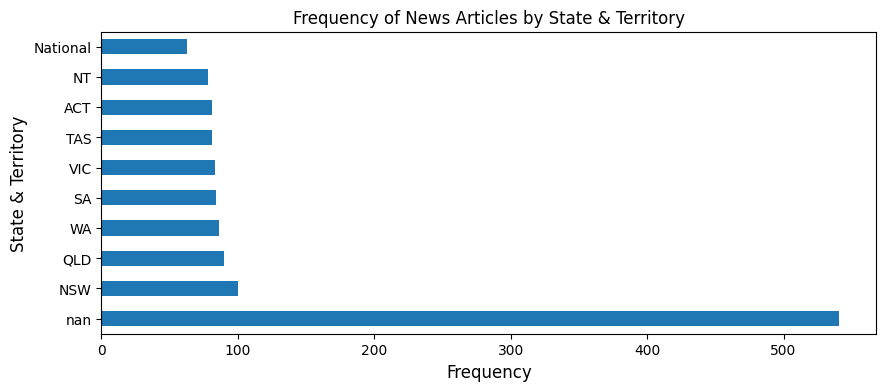

In [19]:
#import packages
import matplotlib.pyplot as plt # for plotting
from matplotlib.pyplot import figure # for plotting

# specify fig size and dpi
figure(figsize=(10, 4), dpi=100)
data_overview['Tags_Transformed'].value_counts().plot(kind='barh')
plt.title('Frequency of News Articles by State & Territory', fontsize = 12)
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('State & Territory', fontsize = 12)
plt.show()

In [20]:
# select relevant columns for further processing
data2 = data[['Data_Date', 'Title', 'Date_Transformed', 'Body_Transformed', 'Tags_Transformed']]

# save transformed data for use in the NLP pipeline
data.to_csv(r'C:/Users/Imran/Desktop/Assignment_3_Repo/data2.csv', index = False)

In [21]:
data2.head()

,Data_Date,Title,Date_Transformed,Body_Transformed,Tags_Transformed
0,24-04-2021,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,"(National, VIC)"
1,24-04-2021,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,"(National, NSW, VIC, QLD, NT, TAS, ACT, WA, SA)"
2,24-04-2021,"Housing lending may be cheap, but regulators a...",2021-03-22,New data suggests changes to mortgage lending ...,"(National, NSW, SA, VIC, QLD, TAS, WA, ACT, NT)"
3,24-04-2021,Sydney property values reach new record high,2021-03-15,CoreLogic today announced Sydney property valu...,"(National, NSW)"
4,24-04-2021,Momentum builds across Australian housing mark...,2021-03-01,Australian home values surged 2.1% higher in F...,"(National, NSW, QLD, VIC, NT, SA, WA, ACT, TAS)"


## Demonstration of the Web Crawler Application

The following figure demonstrates the property news web crawler opening the *onthehouse* website on the property news page. \

\begin{figure}[H]
    \centering
    \includegraphics{Screenshot1-cropped}
    \caption{Screenshot1-cropped}
    \label{Screenshot1-cropped}
\end{figure}

\begin{center} Figure 4: Web Crawler Starting Up \end{center}
\

The following figure demonstrates the property news web crawler extracting the five URL addresses per page. \

\begin{figure}[H]
    \centering
    \includegraphics{Screenshot2}
    \caption{Screenshot2}
    \label{Screenshot2}
\end{figure}

\begin{center} Figure 5: Web Crawler Getting URL Addresses \end{center}
\

The following is a screenshot of the list of URL addresses stored as a CSV file. \

\begin{figure}[H]
    \centering
    \includegraphics{Screenshot4}
    \caption{Screenshot4}
    \label{Screenshot4}
\end{figure}

\begin{center} Figure 6: URL Addresses Saved to CSV \end{center}
\

The following figure demonstrates the property news web crawler shifting towards extracting the title, date, body and tag data from each of the URL addresses collected. \

\begin{figure}[H]
    \centering
    \includegraphics{Screenshot3}
    \caption{Screenshot3}
    \label{Screenshot3}
\end{figure}

\begin{center} Figure 7: Web Crawler Extracting News Article Data \end{center}
\

The following is a screenshot of the extracted title, date, body and tag data stored as a CSV file. It also includes the date the data was extracted. \

\begin{figure}[H]
    \centering
    \includegraphics{Screenshot5}
    \caption{Screenshot5}
    \label{Screenshot5}
\end{figure}

\begin{center} Figure 8: Data Extracted Saved to CSV \end{center}
\

\pagebreak

# References

Caulfield, M. (2017). WHAT MAKES A TRUSTWORTHY NEWS SOURCE? Retrieved from: https://webliteracy.pressbooks.com/chapter/what-makes-a-trustworthy-news-source/

\

Datafiniti. (2014). Building a Web Scraper. Retrieved from: https://blog.datafiniti.co/building-a-web-scraper-f010a3d5f557

\

Heydt, M. (2018). Crawling with delays. Retrieved from: https://www.oreilly.com/library/view/python-web-scraping/9781787285217/9aca491e-81f1-4112-b1a8-1a0f00420b0c.xhtml

\

Lewallen, R. (2005). Advantages of an Object-Oriented Approach (for new programmers). Retrieved from: http://codebetter.com/raymondlewallen/2005/02/08/advantages-of-an-object-oriented-approach-for-new-programmers/

\

Onthehouse. (2021). Property News. Retrieved from: https://www.onthehouse.com.au

\

Python Software Foundation. (2021). Classes. Retrieved from: https://docs.python.org/3/tutorial/classes.html

\

Sahin, K. (2019). Practical XPath for Web Scraping. Retrieved from: https://www.scrapingbee.com/blog/practical-xpath-for-web-scraping/

\

Statcounter. (2021). Browser Market Share Worldwide. Retrieved from: https://gs.statcounter.com/browser-market-share